In [7]:
import pandas as pd 
import numpy as np
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [2]:

test=pd.read_csv('Credit_Risk_Validate_Data.csv')

In [3]:
train=pd.read_csv('Credit_Risk_Train_Data.csv')

In [4]:
import os
os.getcwd()

'c:\\Users\\user\\Desktop\\Credit_Risk_analysis.ipynb'

In [5]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,N


In [6]:
# last columns have different name 
# let make name  and then merge them together
# so that we can fill missing values simulateneously
print(test.columns)
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [7]:
test.rename(columns={'outcome':'Loan_Status'},inplace=True)

In [8]:
data_all=pd.concat([train,test],axis=0)

In [9]:
data_all.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [11]:
# while concatenation index is disturb 
data_all.reset_index(inplace=True,drop=True)

In [12]:
 # give missing values of by columns
data_all.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# before proceeding to model building lets fill missing values

In [14]:
Counter(data_all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [15]:
Counter(data_all['Gender'])
d={'Male': 775, 'Female': 182}
d1=list(d.keys())
d2=list(d.values())


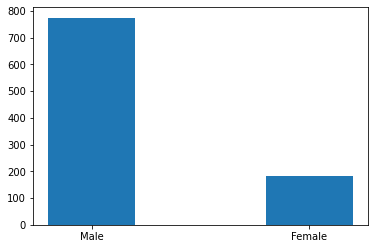

In [16]:
import matplotlib.pyplot as plt
plt.bar(d1,d2,width=.4)
plt.show()

In [17]:
pd.crosstab(data_all['Self_Employed'],data_all['Gender'])

Gender,Female,Male
Self_Employed,,
No,152,637
Yes,19,94


In [18]:
s1=data_all[data_all['Gender'].isnull()].index.tolist()


In [19]:
s=data_all[data_all['Self_Employed']=='Yes'].index.tolist()

In [20]:
var1=[]
for i in s1:
    if i in s:
        
        var1.append(i)
        
    

In [21]:
data_all['Gender'][var1]='Male'

In [22]:
Counter(data_all['Gender'])

Counter({'Male': 781, 'Female': 182, nan: 18})

In [23]:
s2=data_all[data_all['Gender'].isnull()].index.tolist()

In [24]:
s3=s2[:16]

In [25]:
data_all['Gender'][s3]='Male'

In [26]:
data_all['Gender'][s2[16:]]='Female'

In [27]:
Counter(data_all['Gender'])

Counter({'Male': 797, 'Female': 184})

In [28]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
# Marriage is depend on Dependence
pd.crosstab(data_all['Married'],data_all['Dependents'],margins= True)

Dependents,0,1,2,3+,All
Married,,,,,
No,276,36,14,12,338
Yes,269,124,146,79,618
All,545,160,160,91,956


In [30]:
s=data_all[data_all['Married'].isnull()].index.tolist()

In [31]:
s

[104, 228, 435]

In [32]:
data_all['Dependents'][s]

104    NaN
228    NaN
435    NaN
Name: Dependents, dtype: object

In [33]:
data_all['Married'][104,228]='Yes'


In [34]:
data_all['Married'][435]='No'

In [35]:
data_all.isnull().sum()# Check

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

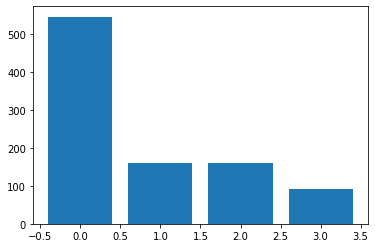

In [38]:
d={'0': 545, '1': 160, '2': 160, '3': 91}
d1=list(d.keys())
d2=list(d.values())
d3=[]
for i in d1:
    d3.append(int(i))

plt.bar(d3,d2)
plt.show()


In [39]:
s=data_all[(data_all['Dependents'].isnull()) & (data_all['Married']=='No')].index.tolist()

In [40]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [41]:
s

[293, 332, 355, 435, 597, 684, 752, 879, 916, 926]

In [42]:
data_all['Dependents'].iloc[s]='0'

In [43]:
Counter(data_all['Dependents'])

Counter({'0': 555, '1': 160, '2': 160, '3+': 91, nan: 15})

In [44]:
s=data_all[(data_all['Dependents'].isnull()) & (data_all['Married']=='Yes')].index.tolist()

In [45]:
s

[102, 104, 120, 226, 228, 301, 335, 346, 517, 571, 660, 725, 816, 861, 865]

In [46]:
data_all['Dependents'].iloc[s]='2'

In [47]:
Counter(data_all['Dependents'])

Counter({'0': 555, '1': 160, '2': 175, '3+': 91})

In [48]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [50]:
pd.crosstab(data_all['Gender'],data_all['Self_Employed'])

Self_Employed,No,Yes
Gender,,
Female,154,19
Male,653,100


In [51]:
# most of the time Female are not Self employed
data_all['Self_Employed'].iloc[data_all[ (data_all['Self_Employed'].isnull())  & (data_all['Gender']=='Female')].index.tolist()]='No'

In [52]:
Counter(data_all['Self_Employed'])

Counter({'No': 818, 'Yes': 119, nan: 44})

In [54]:
Counter(data_all['Self_Employed'])

Counter({'No': 818, 'Yes': 119, nan: 44})

In [55]:
s=data_all[data_all['Self_Employed'].isnull()].index.tolist()

In [56]:
s1=s[:-4]

In [57]:
data_all['Self_Employed'].iloc[s1]='No'

In [58]:
Counter(data_all['Self_Employed'])

Counter({'No': 858, 'Yes': 119, nan: 4})

In [59]:
data_all['Self_Employed'].iloc[data_all[data_all['Self_Employed'].isnull()].index.tolist()]='Yes'

In [60]:
Counter(data_all['Self_Employed'])

Counter({'No': 858, 'Yes': 123})

In [62]:
# check
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
data_all['LoanAmount'].max()



700.0

In [64]:
data_all['LoanAmount'].min()


9.0

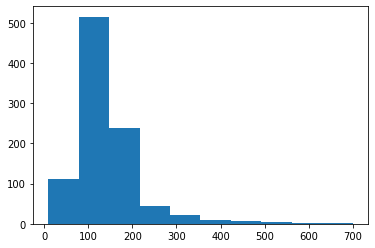

In [78]:
plt.hist(data_all['LoanAmount'])
plt.show()

In [114]:
s=np.linspace(data_all['LoanAmount'].min(),data_all['LoanAmount'].max(),10,retstep=True)

In [74]:
s

(array([  9.        ,  85.77777778, 162.55555556, 239.33333333,
        316.11111111, 392.88888889, 469.66666667, 546.44444444,
        623.22222222, 700.        ]),
 76.77777777777777)

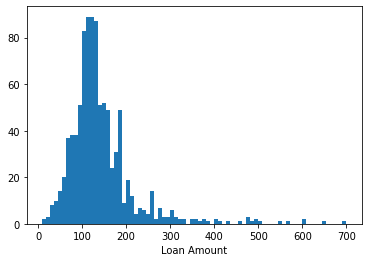

In [82]:
plt.hist(data_all['LoanAmount'],bins=76)
plt.xlabel('Loan Amount')
plt.show()


In [83]:
data_all.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

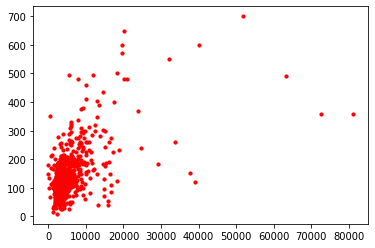

In [112]:
plt.scatter(data_all['ApplicantIncome'],data_all['LoanAmount'],c='r',s=10)
s=data_all['Loan_ID'].index.tolist()

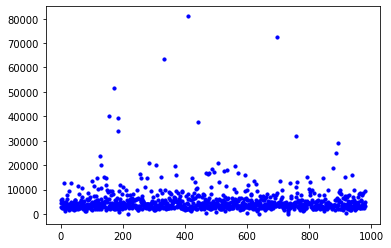

In [111]:

plt.scatter(s,data_all['ApplicantIncome'],c='blue',s=10)

In [121]:
s=data_all[data_all['LoanAmount'].isnull()].index.tolist()

In [127]:
data_all['LoanAmount'].iloc[s]=int(np.random.randint(100,150))

In [129]:
# we have in histogram that maximum value is between 100 to 150
for i in s:
    data_all['LoanAmount'].iloc[i]=int(np.random.randint(100,150))

In [130]:
data_all['LoanAmount'].iloc[s]

0      138.0
35     145.0
63     123.0
81     110.0
95     144.0
102    100.0
103    111.0
113    142.0
127    126.0
202    130.0
284    103.0
305    134.0
322    117.0
338    145.0
387    114.0
435    149.0
437    116.0
479    122.0
524    149.0
550    139.0
551    118.0
605    141.0
692    143.0
715    110.0
802    124.0
861    129.0
903    101.0
Name: LoanAmount, dtype: float64

In [131]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [142]:
# no relation is found
data_all.corrwith(data_all['Loan_Amount_Term'])

ApplicantIncome     -0.023089
CoapplicantIncome   -0.043860
LoanAmount           0.052927
Loan_Amount_Term     1.000000
Credit_History      -0.020439
dtype: float64

In [143]:
Counter(data_all['Loan_Amount_Term'])

Counter({360.0: 823,
         120.0: 4,
         240.0: 8,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         180.0: 66,
         60.0: 3,
         300.0: 20,
         nan: 1,
         480.0: 23,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         36.0: 3,
         84.0: 7,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         12.0: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         350.0: 1,
         nan: 1,
         nan: 1,
         6.0: 1})

In [146]:
data_all['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

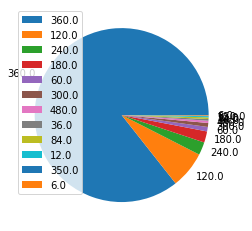

In [176]:
plt.pie(data_all['Loan_Amount_Term'].value_counts(),labels=s)
plt.legend()
plt.show()

In [155]:
s=data_all['Loan_Amount_Term'].unique()

In [159]:
s=list(s)

In [168]:
s.pop(3)

nan

In [169]:
s

[360.0, 120.0, 240.0, 180.0, 60.0, 300.0, 480.0, 36.0, 84.0, 12.0, 350.0, 6.0]

In [179]:
var=data_all[data_all['Loan_Amount_Term'].isnull()].index.tolist()
var1=var[:18]

In [181]:
data_all['Loan_Amount_Term'].iloc[var1]=float(360)

In [187]:
data_all['Loan_Amount_Term'].iloc[data_all[data_all['Loan_Amount_Term'].isnull()].index.tolist()]=120

In [188]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [195]:
data_all.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [192]:
from collections import Counter
import numpy as np


In [193]:
Counter(data_all['Credit_History'])

Counter({1.0: 754,
         0.0: 148,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         n

In [194]:
data_all.corrwith(data_all['Credit_History'])

ApplicantIncome      0.023378
CoapplicantIncome   -0.027253
LoanAmount          -0.007640
Loan_Amount_Term    -0.026504
Credit_History       1.000000
dtype: float64

In [200]:
data_all['Credit_History'][data_all['Credit_History'].isnull()]=1

In [201]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [202]:
Counter(data_all['Credit_History'])

Counter({1.0: 833, 0.0: 148})

In [203]:
import pickle
f=open('data_all.pkl','bw')
f1=pickle.dump(data_all,f)
f.close()

In [1]:
import pickle

In [2]:
f=open('data_all.pkl','rb')
f1=pickle.load(f)
f.close()

In [4]:
data_all=f1

In [11]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
data_all_new=pd.get_dummies(data_all.drop('Loan_ID',axis=1),drop_first=True)

In [15]:
data_all_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,138.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,1
977,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
978,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,1
979,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,0


## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [32]:
X=data_all_new.iloc[:]

In [33]:
X.drop('Loan_Status_Y',axis=1,inplace=True)

In [38]:
X.shape

(981, 14)

In [40]:
y=data_all_new['Loan_Status_Y']

In [41]:
y

0      1
1      0
2      1
3      1
4      1
      ..
976    1
977    1
978    1
979    0
980    1
Name: Loan_Status_Y, Length: 981, dtype: uint8

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [84]:
X_train.shape

(784, 14)

In [85]:
X_test.shape

(197, 14)

In [47]:
from sklearn.preprocessing import StandardScaler

In [51]:
from sklearn.model_selection import KFold

In [86]:
kf=KFold(n_splits=5)



In [87]:
for train_index,val_index in kf.split(X_train):
    # print('Train',train_index,'Validation',val_index)
    X_train,X_val=X.iloc[train_index],X.iloc[val_index]
    y_train,y_val=y[train_index],y[val_index]

In [88]:
scale=StandardScaler()
X_test=scale.fit_transform(X_test)
X_train=scale.fit_transform(X_train)
X_val=scale.fit_transform(X_val)

In [73]:
import seaborn as sns

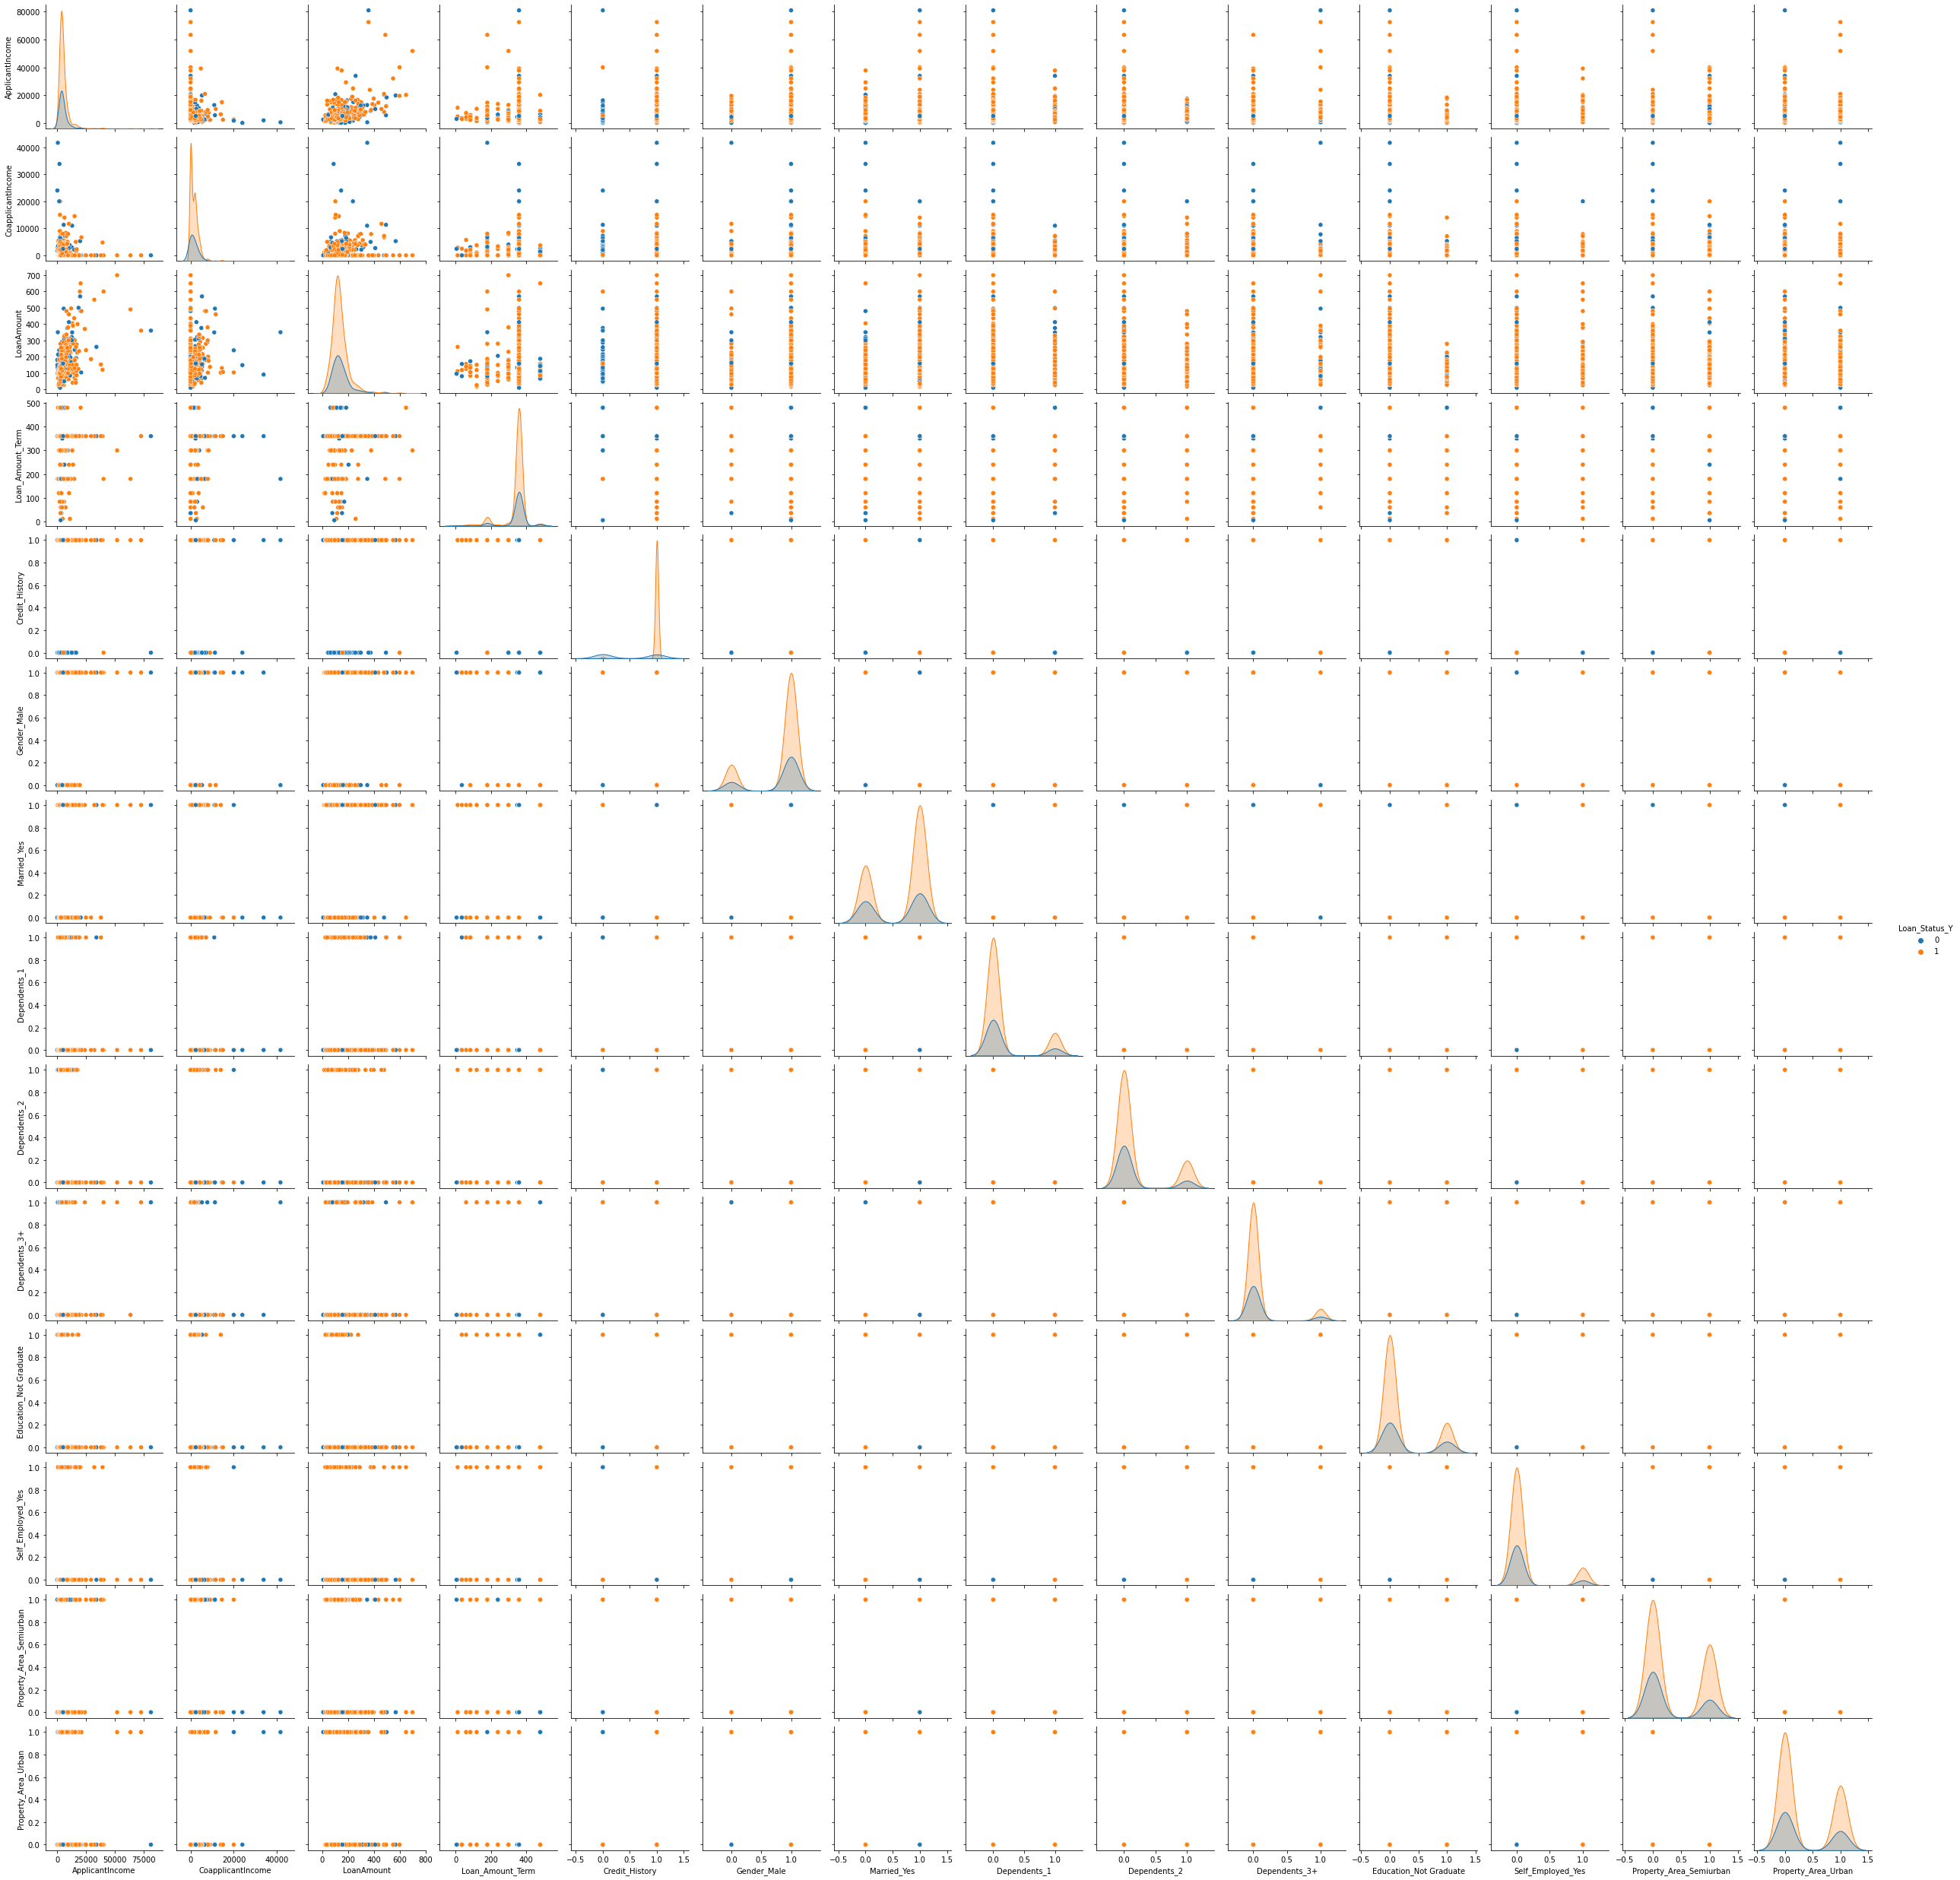

In [74]:
sns.pairplot(data=data_all_new,hue='Loan_Status_Y')

## over lapping is less so we use  Algorithms (KNN and Logistic regression)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [90]:
p=model.predict(X_test)


In [80]:
from sklearn.metrics import confusion_matrix,classification_report

In [91]:
cf=confusion_matrix(y_test,p)
cf

array([[ 31,  24],
       [  4, 138]], dtype=int64)

In [92]:
cl=classification_report(y_test,p)

In [93]:
cl

'              precision    recall  f1-score   support\n\n           0       0.89      0.56      0.69        55\n           1       0.85      0.97      0.91       142\n\n    accuracy                           0.86       197\n   macro avg       0.87      0.77      0.80       197\nweighted avg       0.86      0.86      0.85       197\n'

## try for more accuracy use Logistic Regerssion

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [96]:
p=model.predict(X_test)

In [97]:
cf=confusion_matrix(y_test,p)

In [98]:
cf

array([[ 31,  24],
       [  1, 141]], dtype=int64)

In [99]:
cl=classification_report(y_test,p)

In [100]:
cl

'              precision    recall  f1-score   support\n\n           0       0.97      0.56      0.71        55\n           1       0.85      0.99      0.92       142\n\n    accuracy                           0.87       197\n   macro avg       0.91      0.78      0.82       197\nweighted avg       0.89      0.87      0.86       197\n'

# So are model is 89% accurate